In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **1.FIFA World Cup**

*The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. The current champion is France, which won its second title at the 2018 tournament in Russia*.

![](https://en.wikipedia.org/wiki/FIFA_World_Cup#/media/File:Tour_da_Ta%C3%A7a_da_Copa_do_Mundo_(14231974005).jpg)*The 21 World Cup tournaments have been won by eight national teams. Brazil have won five times, and they are the only team to have played in every tournament. The other World Cup winners are Germany and Italy, with four titles each; Argentina, France, and inaugural winner Uruguay, with two titles each; and England and Spain, with one title each.*

# ***2.Important Libaries***

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ***3.Read Datasheet***

In [54]:
df=pd.read_csv("G:\\Internship\\Surge\\For Evaluation\\Project\\data\\datatables\\12_Sports.csv")
print(df.shape)

(18207, 18)


*So the dataset has 18 attributes and 18207 rows*

In [4]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


# ***3. Time for cleaning the dataset***

*Dataset cleaning is an important set of any EdA as it will help in understanding the patterns well.
We will start by seeing whether the datset has any null values or not.*


In [5]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

*So we see that the attributes such as 'Club','Contract Valid Until','International Reputation','Skill Moves','Value' contains null values.
We will remove the tuples which contain such null values*

In [55]:
df=df.dropna(subset=['Club','Contract Valid Until','International Reputation','Skill Moves','Value'])

*Let us check that whether we were able to succesfull remove all the tuples which contained null values.*

In [56]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

*So now we can rest assured that all the dataset has been completely cleaned off of null values*

*So now since the dataset cleaning step is complete we can focus more on exploring the dataset itself.*

# ***4.Checking the  number of unique instance of an attribute***

In [8]:
for f in df.columns:
    print(f,df[f].nunique())

ID 17907
Name 16913
Age 28
Nationality 163
Overall 48
Potential 47
Club 651
Value 216
Wage 143
Preferred Foot 2
International Reputation 5
Skill Moves 5
Position 27
Joined 22
Contract Valid Until 35
Height 21
Weight 57
Release Clause 1245


# ***5.Age***

*Let us take a closer look at the age of the players.
More accurately we will focusing on the distribution of the age data*

25.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

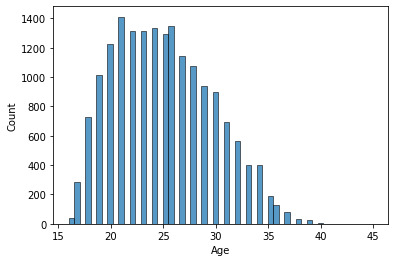

In [9]:
print(df['Age'].median())
sns.histplot(x='Age',data=df)

*The median age is 25 i.e most of the players have age closer to 25.*

# ***6.Preferred Foot***

*Let us see whether majority of players prefer left foot or right foot*

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

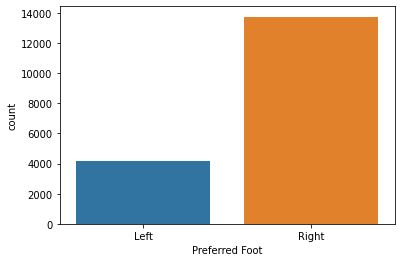

In [10]:
sns.countplot(x='Preferred Foot',data=df)

*It seems most players like prefer to take the shot with their right foot.But still unclear on how many players though*

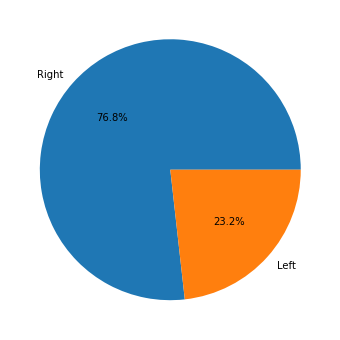

In [11]:
plt.subplots(figsize=(6,6))
plt.pie(df["Preferred Foot"].value_counts(), labels=["Right","Left"],autopct="%1.1f%%")
plt.show()

*Well now we know. 76.8% of the players prefer right foot *

# ***7.Position they play in***

*Let's find out which position most players play in*

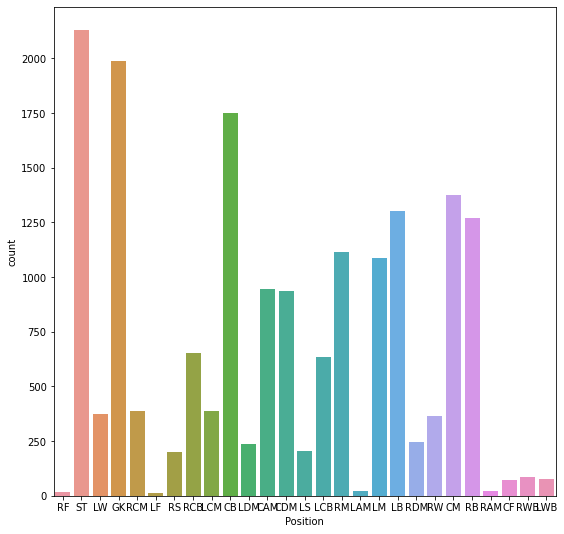

In [12]:
plt.subplots(figsize=(9,9))
sns.countplot(x='Position',data=df)
plt.show()

*It seems as though most players play in the ST position*

# **8.International Reputation**
*Internation Reputation is a huge factor when it comes to a player and the team he is in. Let us take a closer look as to how strong are their reputation on a scale of 1-5*

<AxesSubplot:xlabel='International Reputation', ylabel='count'>

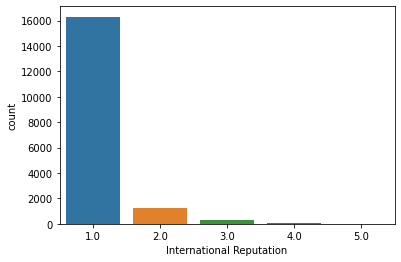

In [13]:
sns.countplot(x='International Reputation',data=df)

*This gives us any early idea as to how many playes have the highest international reputation.*

# ***6.Skill Moves***
*Skill Moves of a  player directly translates into their performace in a game.*

<AxesSubplot:xlabel='Skill Moves', ylabel='count'>

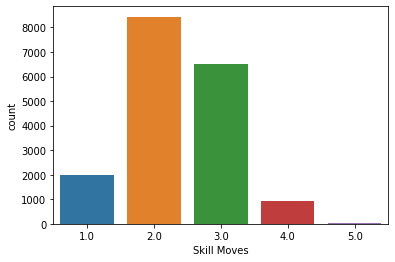

In [14]:
sns.countplot(x='Skill Moves',data=df)

*Most of the players are of skill set point 2.*

# ***7.Nationality***
*Let's find the top 10 countries with the most players in FIFA.*

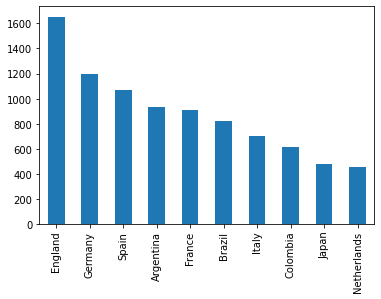

In [15]:
national = df['Nationality'].value_counts()[:10]
national.plot.bar()
plt.show()

# ***8.Value,Wage,Release Clause***
*From here on now, we will focus on the relation between these three attributes.*

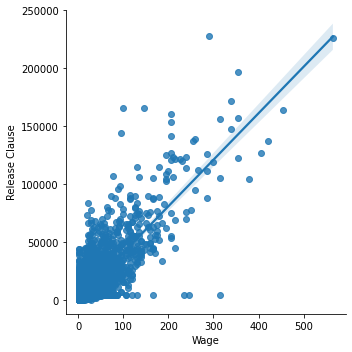

In [16]:
sns.lmplot(x='Wage',y='Release Clause',data=df)

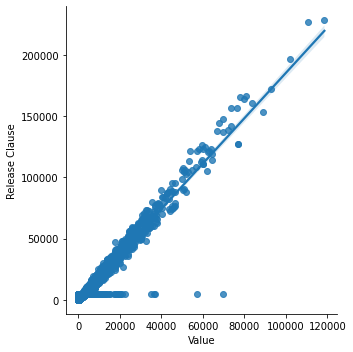

In [17]:
sns.lmplot(x='Value',y='Release Clause',data=df)

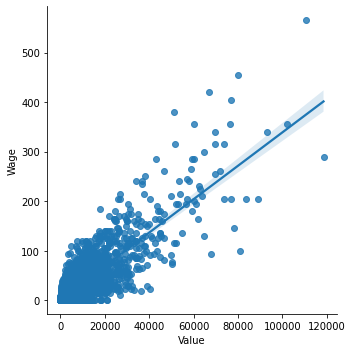

In [18]:
sns.lmplot(x='Value',y='Wage',data=df)

# ***8.Clubs***
*Lastly, we will take a look at the top 5 clubs with most players.*

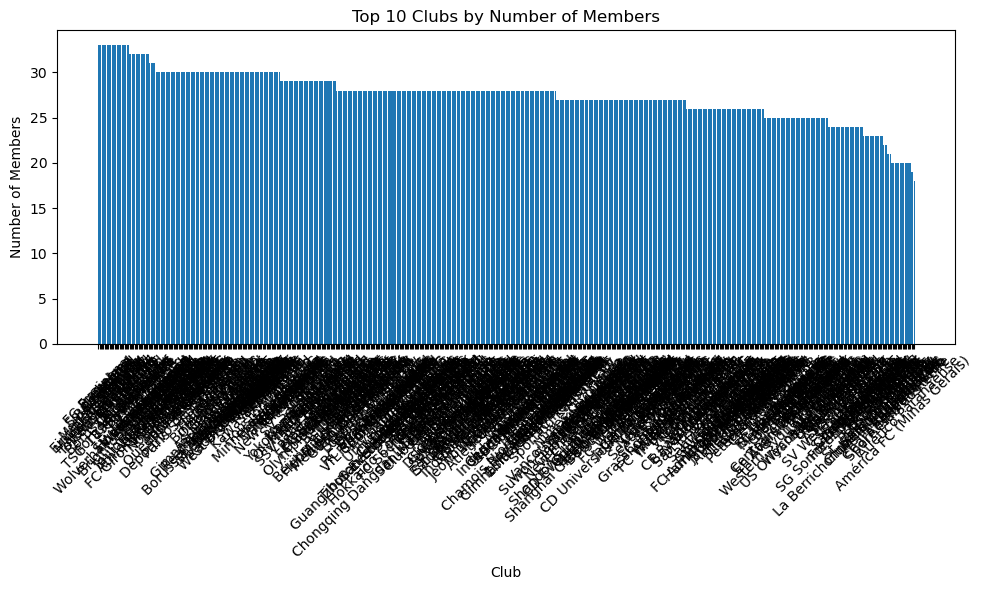

In [60]:
# Get the top 10 clubs based on value counts
top_clubs = df["Club"].value_counts().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_clubs.index, top_clubs.values)

plt.xlabel('Club')
plt.ylabel('Number of Members')
plt.title('Top 10 Clubs by Number of Members')
plt.xticks(rotation=45)  # Rotate the club names for better visibility
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

*Thank you. I am new to the whole of Data Science. So do comment your suggestion or improvements in the comment section. And do not forget to upvote if you have found it useful.*